# Simple Linear Regression

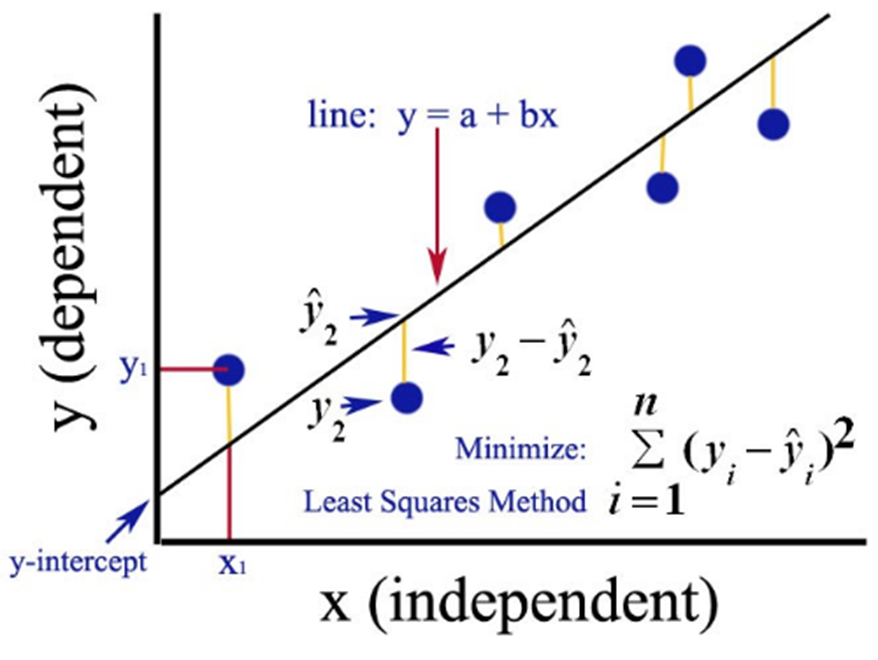

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [2]:
import pandas as pd 
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### PROFIT ~ RND
### PROFIT = B0 + B1*RND
### Seperate X(RND) and Y(PROFIT)

<Axes: xlabel='RND', ylabel='PROFIT'>

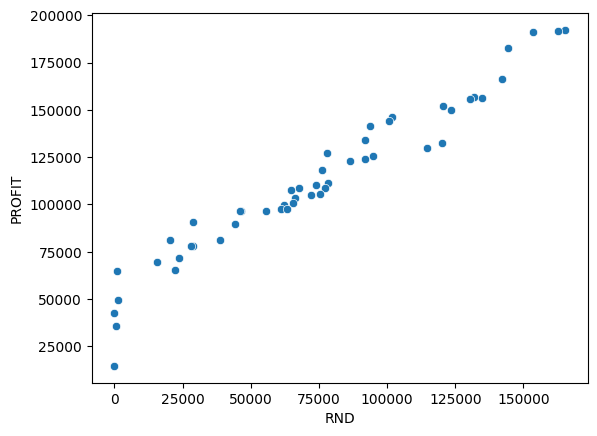

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x='RND', y='PROFIT')

In [7]:
X = df[['RND']]
Y = df[['PROFIT']]

In [8]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Creating a linear regression model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Get model intercept and coefficent

In [11]:
# B1 value (Slope)
model.coef_

array([[0.85429137]])

In [12]:
# B0 Value (Intercept)
model.intercept_

array([49032.89914125])

### PROFIT_pred = 49032.89 + 0.8543*RND

### Visualize the line

<Axes: xlabel='RND', ylabel='PROFIT'>

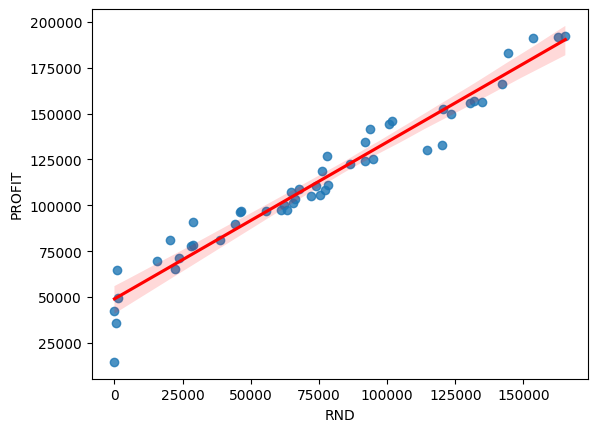

In [13]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'}, ci=99)

### Predicting out of sample data

In [14]:
rnd = [[120000]]
profit_pred = model.predict(rnd)
profit_pred

array([[151547.86365391]])

# Model Evaluation
1. Mean Squared Error (MSE)
2. Root mean squared error (RMSE)
3. Mean Absolute error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score

In [16]:
# R2 score
model.score(X, Y)

0.9465353160804393

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [20]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
mse = mean_squared_error(Y, ypred)
mse

85120931.32706906

In [22]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [23]:
mae = mean_absolute_error(Y, ypred)
mae

6910.98435457961

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.11070141081984847

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.9465353160804393

### Beacause R2 score > 0.8 the model build is very good and can be used for out of sample predictions